# Problem Set 5 by Manikanta Chunduru Balaji

This problem set deals with the Analysis of Twitter tweets. This is a multi classification problem

#Import modules

In [1]:
import pandas as pd
import numpy as np
import sklearn.model_selection
import sklearn.naive_bayes
import collections
import re
import string
import nltk
from nltk.stem.porter import *
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
%matplotlib inline


stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Load data from CSV

In [2]:
#load tweet and label data
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ps5_tweets_text.csv')
labeldata=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ps5_tweets_labels.csv')
labeldatanum=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ps5_tweets_labels_as_numbers.csv')

In [3]:
pd.set_option("display.max_colwidth", -1)

data.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,Id,Tweet
0,0,"https://t.co/UpjxfOgQs8\r\r\n\r\r\nGaisss! Please read this,and please limit yourself to go outside and please,please..always wash your hands,always use the hand sanitizer. \r\r\n\r\r\nAnd please get ready to stock up the food."
1,1,"@mygovindia Today just after a week of lockdown lot of confectionary stores are running out of stock, how will be the seen if lockdown increased because of COVID-19 community spread, specially in B &amp; C class city. Emergency Supply chain need to be pla"
2,2,Tuskys partners with Amref to provide on ground health education and awareness on 19 at all Its supermarket branches Kenya
3,3,@chrissyteigen are u doing ur own grocery shopping now like a regular person or are u still outsourcing it to the working poor at @Postmates to risk getting #coronavirus at the store so u dont have to?
4,4,UK Critical Care Nurse Cries at Empty SuperMarket Shelves Panic Buying\r\r\n\r\r\nhttps://t.co/hw5xbrvWIg\r\r\n\r\r\n@CoronaVirusUPDT #Coronavirus #CoronavirusUK #COVID19
5,5,@ymxr6 Makes my heart ache its the elderly that won't make it through the disease either and people want yo starve them too and force them out every day to expose themselves more and more because they can't bulk buy selfish b*****ds #stopthepeak #stayhome
6,6,COVID-19 wrecks aluminium prices and input costs in China: A00 aluminium ingot price declines by RMB570/t and alumina price by RMB32/t https://t.co/CzTrXNkz2q\r\r\n\r\r\n#COVID19 #aluminium #prices #China #A00aluminium #ingot #aluminaprice #coronavirus #AlCircle #news
7,7,"February Home Prices Increased by 4.1 Percent Annual in U.S., Pre-Coronavirus - WORLD PROPERTY JOURNAL Global News Center\r\r\nhttps://t.co/wWxI6o0ftn https://t.co/aHeGZAo8qT"
8,8,Want advice on avoiding scams related to #COVID-19? Visit the link provided under consumer protection resources:\r\r\nhttps://t.co/WDejxXu90B\r\r\n\r\r\nFind this and other important information when you visit the main page at:\r\r\nhttps://t.co/rXDo8PUptD https://t.co/pQtH197MUQ
9,9,@dailyecho @BBCWatchdog @BBCNews @dailymail and yet property management companies are STILL charging EXTORTIONATE prices for *SHODDY* service with less than a month to pay it. Contact me for more info! #CoronaCrisis #Covid_19 https://t.co/tShlq7B78U


In [4]:
labeldatanum

,Id,Label
0,0,4
1,1,1
2,2,2
3,3,1
4,4,0
...,...,...
37036,37036,1
37037,37037,1
37038,37038,0
37039,37039,2


#Method to preprocess the tweet text

In [5]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;!.?*:]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
def preprocess_tweet_text(tweet):
    #convert ot lower case
    tweet=tweet.lower()
    # Remove urls
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#','', tweet)
    # Remove punctuations
    #tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    #remove unwanted charcaters
    tweet=REPLACE_BY_SPACE_RE.sub(' ', tweet)
    tweet=BAD_SYMBOLS_RE.sub(' ',tweet)
    # Remove stopwords
    tweet_tokens = word_tokenize(tweet)
    filtered_words = [w for w in tweet_tokens if not w in stop_words]
    # remove small words
    #filtered_words1=[w for w in filtered_words if len(w)>3]
    return " ".join(filtered_words)

In [6]:
data.Tweet=data['Tweet'].apply(preprocess_tweet_text)

In [7]:
#data after preprocess
data['Tweet'].head(10)

0    gaisss please read please limit go outside please please always wash hands always use hand sanitizer please get ready stock food                                                                         
1    today week lockdown lot confectionary stores running stock seen lockdown increased covid 19 community spread specially b amp c class city emergency supply chain need pla                                
2    tuskys partners amref provide ground health education awareness 19 supermarket branches kenya                                                                                                            
3    u ur grocery shopping like regular person u still outsourcing working poor risk getting coronavirus store u dont                                                                                         
4    uk critical care nurse cries empty supermarket shelves panic buying coronavirus coronavirusuk covid19                                                                  

#Tokenize the data

In [8]:
#import tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
#tokenizer=Tokenizer(num_words=40000, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer=Tokenizer()
tokenizer.fit_on_texts(data.Tweet)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 43039 unique tokens.


In [13]:
#word index
word_index

{'coronavirus': 1,
 '19': 2,
 'covid': 3,
 'prices': 4,
 'food': 5,
 'supermarket': 6,
 'store': 7,
 'grocery': 8,
 'people': 9,
 'amp': 10,
 'covid19': 11,
 'consumer': 12,
 'shopping': 13,
 'online': 14,
 'pandemic': 15,
 'get': 16,
 'need': 17,
 'workers': 18,
 'panic': 19,
 'sanitizer': 20,
 'us': 21,
 'time': 22,
 'like': 23,
 'home': 24,
 'demand': 25,
 'go': 26,
 'help': 27,
 'hand': 28,
 'stock': 29,
 'one': 30,
 'going': 31,
 'due': 32,
 'buying': 33,
 'oil': 34,
 'new': 35,
 'crisis': 36,
 'please': 37,
 'covid2019': 38,
 'toiletpaper': 39,
 '2': 40,
 'work': 41,
 'toilet': 42,
 'retail': 43,
 'paper': 44,
 'stay': 45,
 'local': 46,
 'today': 47,
 '1': 48,
 'stores': 49,
 'buy': 50,
 'keep': 51,
 'via': 52,
 'many': 53,
 'shelves': 54,
 'still': 55,
 'make': 56,
 'delivery': 57,
 'see': 58,
 'day': 59,
 'know': 60,
 'supply': 61,
 'would': 62,
 'take': 63,
 'lockdown': 64,
 'virus': 65,
 'outbreak': 66,
 'stop': 67,
 'everyone': 68,
 'health': 69,
 'social': 70,
 'staff': 71,

In [14]:
# Getting the biggest sentence
max_len = np.max([len(text.split()) for text in data.Tweet])
print(f'Length of biggest sentence is {max_len}')


Length of biggest sentence is 46


In [15]:
#Padding the tokenized data with max len as they are of unequal lengths
from keras.preprocessing.sequence import pad_sequences
X = tokenizer.texts_to_sequences(data.Tweet)
X =pad_sequences(X, maxlen=max_len)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (37041, 46)


In [16]:
X.shape

(37041, 46)

#Split data into training and test Set

In [17]:
train_x,test_x,train_y,test_y=sklearn.model_selection.train_test_split(X,labeldatanum.Label,test_size=0.2,random_state=42)

#shape of training and test data
print(train_x.shape,train_y.shape)
print(test_x.shape,test_y.shape)

(29632, 46) (29632,)
(7409, 46) (7409,)


#Embedding model

In [18]:
import tensorflow as tf
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size, and output embedding dimension of size between 15-50
    tf.keras.layers.Embedding(len(word_index)+1, 46),
    tf.keras.layers.GlobalAveragePooling1D(),
   # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(16, activation='relu'),
    # Add a Dense layer with 5 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(5, activation='softmax')
])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 46)          1979840   
_________________________________________________________________
global_average_pooling1d (Gl (None, 46)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                752       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 85        
Total params: 1,980,677
Trainable params: 1,980,677
Non-trainable params: 0
_________________________________________________________________


In [19]:
from keras.callbacks import EarlyStopping
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs = 40
batch_size = 64
history = model.fit(train_x, train_y, epochs=num_epochs,validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3)])


Epoch 1/40
834/834 [==============================] - 17s 20ms/step - loss: 1.5561 - accuracy: 0.2846 - val_loss: 1.2197 - val_accuracy: 0.4946
Epoch 2/40
834/834 [==============================] - 16s 20ms/step - loss: 1.0844 - accuracy: 0.5799 - val_loss: 0.9643 - val_accuracy: 0.6275
Epoch 3/40
834/834 [==============================] - 16s 20ms/step - loss: 0.7697 - accuracy: 0.7469 - val_loss: 0.8918 - val_accuracy: 0.6619
Epoch 4/40
834/834 [==============================] - 17s 20ms/step - loss: 0.5817 - accuracy: 0.8313 - val_loss: 0.8682 - val_accuracy: 0.6872
Epoch 5/40
834/834 [==============================] - 16s 20ms/step - loss: 0.4490 - accuracy: 0.8764 - val_loss: 0.9048 - val_accuracy: 0.6711
Epoch 6/40
834/834 [==============================] - 16s 20ms/step - loss: 0.3691 - accuracy: 0.9024 - val_loss: 0.9328 - val_accuracy: 0.6832
Epoch 7/40
834/834 [==============================] - 16s 20ms/step - loss: 0.2929 - accuracy: 0.9256 - val_loss: 0.9942 - val_accuracy:

In [20]:
#Model evaluation
test_loss,test_acc=model.evaluate(test_x,test_y,verbose=2)
test_loss,test_acc

232/232 - 0s - loss: 1.0146 - accuracy: 0.6732


(1.014606237411499, 0.6732352375984192)

In [21]:
def plot_graphs(history, metric):
  plt.title('Model '+metric)
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

(0.0, 1.5291066288948059)

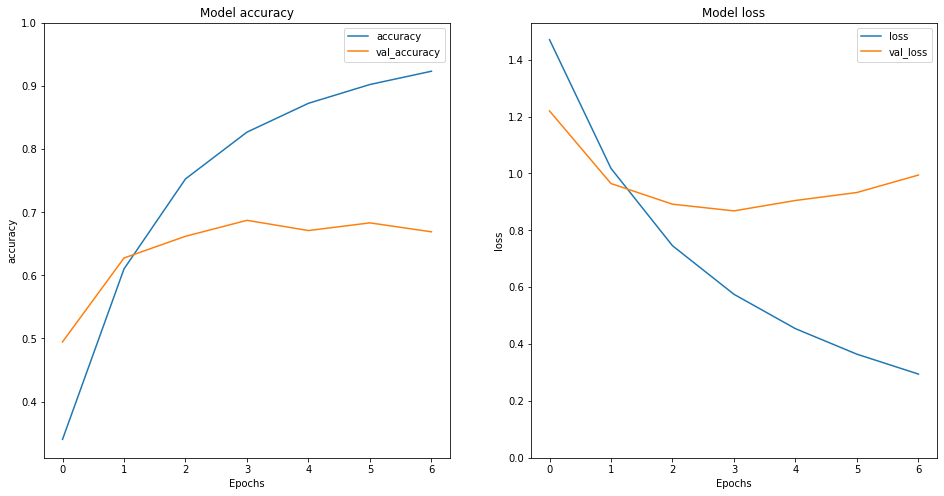

In [22]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [23]:
predictions=model.predict(test_x)
ypreds=[]
for j in range(len(predictions)):
  k=np.argmax(predictions[j])
  ypreds.append(k)

ypreds

[4,
 2,
 3,
 2,
 2,
 3,
 0,
 3,
 3,
 2,
 2,
 3,
 4,
 1,
 2,
 4,
 2,
 3,
 2,
 3,
 2,
 3,
 3,
 2,
 0,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 1,
 0,
 3,
 4,
 2,
 1,
 1,
 4,
 2,
 0,
 1,
 3,
 2,
 1,
 3,
 1,
 3,
 1,
 4,
 1,
 3,
 2,
 3,
 2,
 1,
 3,
 3,
 0,
 3,
 2,
 0,
 0,
 4,
 3,
 3,
 4,
 2,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 3,
 1,
 3,
 0,
 4,
 2,
 0,
 3,
 3,
 0,
 1,
 1,
 4,
 3,
 3,
 1,
 0,
 4,
 1,
 3,
 4,
 0,
 3,
 2,
 3,
 3,
 2,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 4,
 1,
 2,
 1,
 1,
 1,
 3,
 1,
 1,
 3,
 1,
 2,
 4,
 0,
 1,
 2,
 3,
 2,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 0,
 1,
 1,
 3,
 0,
 0,
 1,
 2,
 1,
 0,
 0,
 1,
 3,
 1,
 2,
 3,
 3,
 3,
 3,
 2,
 0,
 3,
 3,
 0,
 0,
 2,
 4,
 4,
 1,
 1,
 2,
 2,
 2,
 1,
 4,
 1,
 3,
 3,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 3,
 2,
 0,
 3,
 1,
 2,
 3,
 3,
 0,
 2,
 1,
 4,
 3,
 3,
 2,
 1,
 1,
 3,
 2,
 2,
 3,
 0,
 0,
 0,
 1,
 2,
 3,
 1,
 3,
 2,
 3,
 4,
 3,
 2,
 3,
 3,
 2,
 4,
 3,
 3,
 4,
 3,
 1,
 1,
 2,
 3,
 3,
 1,
 0,
 3,
 1,
 1,
 3,
 4,
 2,
 1,
 4,
 2,
 4,


In [24]:
labels=[0,1,2,3,4]
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

y_test = label_binarize(test_y, classes=labels)
y_pred = label_binarize(ypreds,classes=labels)

#ROC AUC score
roc_auc_score(y_test, y_pred,average='macro',multi_class='ovo')

0.7933714899387304

In [25]:
accuracy=sum(ypreds==test_y)/len(test_y)

In [26]:
accuracy

0.6732352544202996

# RNN LSTM with Bidirectional wrapper

In [45]:
import tensorflow as tf
model1 = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size
    tf.keras.layers.Embedding(len(word_index)+1, 46),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 46)          1979840   
_________________________________________________________________
bidirectional_5 (Bidirection (None, 100)               38800     
_________________________________________________________________
dense_12 (Dense)             (None, 16)                1616      
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 85        
Total params: 2,020,341
Trainable params: 2,020,341
Non-trainable params: 0
_________________________________________________________________


In [46]:
from keras.callbacks import EarlyStopping
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs = 40
batch_size = 64
history1 = model1.fit(train_x, train_y, epochs=num_epochs,validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/40
834/834 [==============================] - 50s 56ms/step - loss: 1.4144 - accuracy: 0.3608 - val_loss: 0.8615 - val_accuracy: 0.6525
Epoch 2/40
834/834 [==============================] - 46s 56ms/step - loss: 0.6586 - accuracy: 0.7656 - val_loss: 0.7556 - val_accuracy: 0.7227
Epoch 3/40
834/834 [==============================] - 46s 55ms/step - loss: 0.3954 - accuracy: 0.8735 - val_loss: 0.8272 - val_accuracy: 0.7206
Epoch 4/40
834/834 [==============================] - 46s 55ms/step - loss: 0.2656 - accuracy: 0.9197 - val_loss: 0.9787 - val_accuracy: 0.7018
Epoch 5/40
834/834 [==============================] - 46s 55ms/step - loss: 0.1839 - accuracy: 0.9461 - val_loss: 1.0590 - val_accuracy: 0.6970


In [47]:
#Model evaluation
test_loss,test_acc=model1.evaluate(test_x,test_y,verbose=2)
test_loss,test_acc

232/232 - 2s - loss: 1.0754 - accuracy: 0.7013


(1.075408935546875, 0.7013092041015625)

In [48]:
predictions=model1.predict(test_x)
ypreds=[]
for j in range(len(predictions)):
  k=np.argmax(predictions[j])
  ypreds.append(k)

y_test = label_binarize(test_y, classes=labels)
y_pred = label_binarize(ypreds,classes=labels)

#ROC AUC score
roc_auc_score(y_test, y_pred,average='macro',multi_class='ovo')

0.8082273419522104

(0.0, 1.2577298626303672)

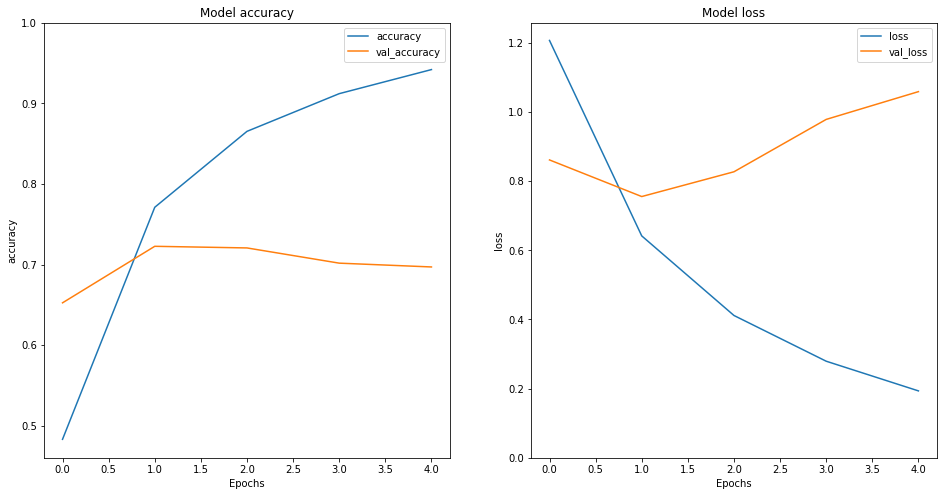

In [49]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history1, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history1, 'loss')
plt.ylim(0, None)

# RNN LSTM 

In [60]:
import tensorflow as tf
model2 = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(len(word_index)+1, 25),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, None, 25)          1076000   
_________________________________________________________________
lstm_9 (LSTM)                (None, 50)                15200     
_________________________________________________________________
dense_20 (Dense)             (None, 16)                816       
_________________________________________________________________
dense_21 (Dense)             (None, 5)                 85        
Total params: 1,092,101
Trainable params: 1,092,101
Non-trainable params: 0
_________________________________________________________________


In [61]:
from keras.callbacks import EarlyStopping
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs = 40
batch_size = 64
history2 = model2.fit(train_x, train_y, epochs=num_epochs,validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/40
834/834 [==============================] - 30s 34ms/step - loss: 1.4274 - accuracy: 0.3565 - val_loss: 0.9061 - val_accuracy: 0.6380
Epoch 2/40
834/834 [==============================] - 28s 34ms/step - loss: 0.6835 - accuracy: 0.7526 - val_loss: 0.7803 - val_accuracy: 0.7021
Epoch 3/40
834/834 [==============================] - 28s 33ms/step - loss: 0.4089 - accuracy: 0.8682 - val_loss: 0.8742 - val_accuracy: 0.7014
Epoch 4/40
834/834 [==============================] - 28s 34ms/step - loss: 0.2882 - accuracy: 0.9103 - val_loss: 0.9522 - val_accuracy: 0.7068
Epoch 5/40
834/834 [==============================] - 28s 34ms/step - loss: 0.2100 - accuracy: 0.9376 - val_loss: 1.0869 - val_accuracy: 0.6862


In [62]:
#Model evaluation
test_loss,test_acc=model2.evaluate(test_x,test_y,verbose=2)
test_loss,test_acc

232/232 - 1s - loss: 1.0932 - accuracy: 0.6874


(1.093209147453308, 0.6874071955680847)

In [63]:
predictions=model2.predict(test_x)
ypreds=[]
for j in range(len(predictions)):
  k=np.argmax(predictions[j])
  ypreds.append(k)

y_test = label_binarize(test_y, classes=labels)
y_pred = label_binarize(ypreds,classes=labels)

#ROC AUC score
roc_auc_score(y_test, y_pred,average='macro',multi_class='ovo')

0.8051196614491063

In [ ]:
# Kaggle section ignore 
#kaggledata=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ps5_tweets_text_for_the_kaggle_competition.csv')
# kaggledata

,Id,Tweet
0,0,"TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1"
1,1,"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY"
2,2,Find out how you can protect yourself and loved ones from #coronavirus. ?
3,3,#Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #BigApple 1st confirmed #coronavirus patient OR a #Bloomberg staged event?\r\r\n\r\r\nhttps://t.co/IASiReGPC4\r\r\n\r\r\n#QAnon #QAnon2018 #QAnon2020 \r\r\n#Election2020 #CDC https://t.co/29isZOewxu
4,4,#toiletpaper #dunnypaper #coronavirus #coronavirusaustralia #CoronaVirusUpdate #Covid_19 #9News #Corvid19 #7NewsMelb #dunnypapergate #Costco One week everyone buying baby milk powder the next everyone buying up toilet paper. https://t.co/ScZryVvsIh
...,...,...
3793,3793,Meanwhile In A Supermarket in Israel -- People dance and sing together to stay positive. ? #CoronaVirus https://t.co/VLLqGI3R16
3794,3794,Did you panic buy a lot of non-perishable items? ECHO needs food donations. It is also looking for volunteers to pack boxes. Volunteers will be screened to be sure they don't have COVID-19. https://t.co/TST4Vjhbu4
3795,3795,Asst Prof of Economics @cconces was on @NBCPhiladelphia talking about her recent research on coronavirus' impact on the economy. Watch it here (starting at :33): https://t.co/8tfYNoro5l
3796,3796,Gov need to do somethings instead of biar je rakyat assume 'lockdown' ke or even worst. Harini semua supermarket crowded like hell. Lagi mudah virus tu tersebar ?? #COVID2019


In [ ]:
# kaggledata.Tweet=kaggledata['Tweet'].apply(preprocess_tweet_text)

In [ ]:
# max_len = np.max([len(text.split()) for text in kaggledata.Tweet])
# print(f'Length of biggest sentence is {max_len}')

Length of biggest sentence is 44


In [ ]:
# X = tokenizer.texts_to_sequences(kaggledata.Tweet)
# X =pad_sequences(X, maxlen=max_len)
# print('Shape of data tensor:', X.shape)

Shape of data tensor: (3798, 44)


In [ ]:
# p=model2.predict(X)
# p

array([[7.30960250e-01, 2.65508980e-01, 1.15602266e-03, 1.89865439e-03,
        4.76090296e-04],
       [2.15206252e-04, 7.04294909e-03, 7.58911530e-03, 8.79410028e-01,
        1.05742626e-01],
       [7.42114644e-05, 1.44026522e-03, 1.56703143e-04, 1.49540035e-02,
        9.83374834e-01],
       ...,
       [4.71572381e-09, 3.10993164e-05, 9.99957800e-01, 1.10993087e-05,
        4.68931782e-09],
       [9.85711396e-01, 8.83008074e-03, 2.76872772e-04, 3.50706838e-03,
        1.67455012e-03],
       [6.07307942e-04, 4.93238494e-03, 1.06772897e-03, 5.33468835e-02,
        9.40045714e-01]], dtype=float32)

In [ ]:
# ypred=[]
# for j in range(len(p)):
#   k=np.argmax(p[j])
#   ypred.append(k)

# ypred

[0,
 3,
 4,
 0,
 2,
 2,
 3,
 0,
 0,
 3,
 3,
 0,
 0,
 4,
 3,
 3,
 4,
 2,
 3,
 4,
 1,
 3,
 3,
 4,
 0,
 4,
 1,
 3,
 0,
 1,
 1,
 4,
 1,
 0,
 1,
 0,
 1,
 0,
 3,
 4,
 3,
 1,
 2,
 3,
 1,
 4,
 4,
 0,
 0,
 0,
 0,
 2,
 1,
 3,
 0,
 2,
 1,
 4,
 1,
 2,
 0,
 0,
 4,
 0,
 3,
 3,
 1,
 4,
 3,
 4,
 1,
 3,
 3,
 1,
 2,
 0,
 1,
 1,
 1,
 3,
 0,
 0,
 4,
 1,
 1,
 2,
 1,
 2,
 0,
 3,
 1,
 1,
 3,
 1,
 2,
 4,
 2,
 4,
 0,
 3,
 3,
 2,
 3,
 3,
 2,
 4,
 4,
 2,
 1,
 1,
 1,
 3,
 4,
 2,
 4,
 1,
 0,
 4,
 1,
 3,
 1,
 3,
 3,
 1,
 0,
 0,
 3,
 4,
 1,
 0,
 0,
 3,
 0,
 0,
 0,
 4,
 4,
 3,
 4,
 2,
 4,
 4,
 1,
 1,
 3,
 3,
 1,
 1,
 0,
 3,
 4,
 4,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 3,
 3,
 3,
 2,
 2,
 3,
 1,
 3,
 4,
 4,
 1,
 4,
 2,
 3,
 0,
 3,
 2,
 4,
 1,
 2,
 2,
 4,
 2,
 3,
 1,
 3,
 1,
 3,
 0,
 1,
 4,
 0,
 3,
 4,
 1,
 3,
 2,
 4,
 3,
 1,
 3,
 3,
 3,
 4,
 3,
 0,
 1,
 4,
 2,
 3,
 0,
 1,
 2,
 4,
 3,
 3,
 1,
 2,
 2,
 1,
 2,
 3,
 3,
 1,
 1,
 4,
 3,
 1,
 1,
 0,
 0,
 3,
 1,
 2,
 1,
 3,
 3,
 2,
 2,
 3,
 4,
 3,
 0,
 1,
 0,
 0,
 3,
 1,
 2,
 2,


In [ ]:
# output=pd.DataFrame(data=ypred,columns=['Predicted'])
# output

,Predicted
0,0
1,3
2,4
3,0
4,2
...,...
3793,3
3794,3
3795,2
3796,0


In [ ]:
# output['Id']=output.index
# output=output[['Id','Predicted']]
# output

,Id,Predicted
0,0,0
1,1,3
2,2,4
3,3,0
4,4,2
...,...,...
3793,3793,3
3794,3794,3
3795,3795,2
3796,3796,0


In [ ]:
# output.to_csv('output10.csv',index=False)